In [14]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# ---- 1. Load dataset ----
file_path = "Explanatory_Variables_1990_2024.csv"
data = pd.read_csv(file_path)

# ---- 2. Convert Date to datetime with explicit format ----
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%y")
data = data.set_index("Date")

# ---- 3. Function to run ADF test with lag=4 ----
def adf_test_lag4(series, var_name):
    result = adfuller(series, maxlag=4, regression="c", autolag=None)
    return {
        "Variable": var_name,
        "ADF Statistic": result[0],
        "p-value": result[1],
        "Lags Used": result[2],
        "Observations": result[3]
    }

# ---- 4. Apply ADF test ----
results = []
for col in data.columns:
    results.append(adf_test_lag4(data[col], col))

# ---- 5. Save results ----
adf_results_lag4 = pd.DataFrame(results)
adf_results_lag4.to_csv("ADF_Results_Lag4.csv", index=False)
data.to_csv("Full_Data.csv")

# ---- 6. Show results ----
print("ADF results saved as ADF_Results_Lag4.csv")
display(adf_results_lag4)


ADF results saved as ADF_Results_Lag4.csv


,Variable,ADF Statistic,p-value,Lags Used,Observations
0,Real Rate,-2.044917,0.267232,4,409
1,Policy Deviations,-2.649227,0.083244,4,409
2,TR Cape,-1.943209,0.312015,4,409
3,M2 (in Billions),1.721750,0.998181,4,409
4,Gold,1.034191,0.994614,4,409
5,BAA Spread,-3.452015,0.009308,4,409
6,Bank Credit (in Billions),2.930796,1.000000,4,409
7,VIX,-4.502857,0.000194,4,409
8,Michigan Sentiment,-2.419208,0.136388,4,409


In [15]:
# ---- 1. Load dataset ----
file_path = "Explanatory_Variables_1990_2024.csv"
data = pd.read_csv(file_path)

# Convert Date to datetime
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%y")
data = data.set_index("Date")

# ---- 2. Transformations ----
transformed = pd.DataFrame(index=data.index)

# Keep in levels
transformed["Real_Rate"] = data["Real Rate"]
transformed["Policy_Deviations"] = data["Policy Deviations"]
transformed["Baa_Spread"] = data["BAA Spread"]
transformed["VIX"] = data["VIX"]
transformed["Michigan_Sentiment"] = data["Michigan Sentiment "]

# YoY growth rates (% change over 12 months)
transformed["TR_CAPE_YoY"] = data["TR Cape"].pct_change(periods=12) * 100
transformed["M2_YoY"] = data["M2 (in Billions)"].pct_change(periods=12) * 100
transformed["Gold_YoY"] = data["Gold"].pct_change(periods=12) * 100
transformed["BankCredit_YoY"] = data["Bank Credit (in Billions)"].pct_change(periods=12) * 100

# ---- 3. Save transformed dataset ----
transformed.to_csv("Transformed_Data.csv")

# ---- 4. Preview ----
print("Final transformed dataset saved as Transformed_Data.csv")
display(transformed.head(15))


Final transformed dataset saved as Transformed_Data.csv


,Real_Rate,Policy_Deviations,Baa_Spread,VIX,Michigan_Sentiment,TR_CAPE_YoY,M2_YoY,Gold_YoY,BankCredit_YoY
Date,,,,,,,,,
1990-01-01,3.78312,0.00137,1.73,17.24,93.0,NaN,NaN,NaN,NaN
1990-02-01,3.89947,0.11772,1.67,24.87,89.5,NaN,NaN,NaN,NaN
1990-03-01,3.80193,0.02018,1.62,21.90,91.3,NaN,NaN,NaN,NaN
1990-04-01,3.93867,0.22868,1.51,22.84,93.9,NaN,NaN,NaN,NaN
1990-05-01,4.00552,0.29553,1.65,18.43,90.6,NaN,NaN,NaN,NaN
1990-06-01,3.58870,-0.12130,1.74,17.09,88.3,NaN,NaN,NaN,NaN
1990-07-01,3.36164,-0.19231,1.73,16.26,88.2,NaN,NaN,NaN,NaN
1990-08-01,3.26737,-0.28658,1.66,21.64,76.4,NaN,NaN,NaN,NaN
1990-09-01,3.34727,-0.20668,1.75,29.58,72.8,NaN,NaN,NaN,NaN


In [16]:
# ---- 1. Load the transformed dataset ----
data = pd.read_csv("Transformed_Data.csv", index_col="Date", parse_dates=True)

# ---- 2. Function to run ADF test with lag=4 ----
def adf_test_lag4(series, var_name):
    result = adfuller(series.dropna(), maxlag=4, regression="c", autolag=None)
    return {
        "Variable": var_name,
        "ADF Statistic": result[0],
        "p-value": result[1],
        "Lags Used": result[2],
        "Observations": result[3]
    }

# ---- 3. Run ADF tests on all transformed variables ----
results = []
for col in data.columns:
    results.append(adf_test_lag4(data[col], col))

# ---- 4. Save results to CSV ----
adf_results_transformed = pd.DataFrame(results)
adf_results_transformed.to_csv("ADF_Results_Transformed_Lag4.csv", index=False)

# ---- 5. Display in Jupyter ----
print("ADF results for transformed data saved as ADF_Results_Transformed_Lag4.csv")
display(adf_results_transformed)

ADF results for transformed data saved as ADF_Results_Transformed_Lag4.csv


,Variable,ADF Statistic,p-value,Lags Used,Observations
0,Real_Rate,-2.044917,0.267232,4,409
1,Policy_Deviations,-2.649227,0.083244,4,409
2,Baa_Spread,-3.452015,0.009308,4,409
3,VIX,-4.502857,0.000194,4,409
4,Michigan_Sentiment,-2.419208,0.136388,4,409
5,TR_CAPE_YoY,-4.596234,0.000131,4,397
6,M2_YoY,-3.086125,0.027597,4,397
7,Gold_YoY,-3.882598,0.002167,4,397
8,BankCredit_YoY,-3.724478,0.003782,4,397


In [17]:
# ---- 1. Generate summary statistics directly from transformed DataFrame ----
summary_stats = transformed.describe().T[["mean", "std", "min", "max"]]

# Rename columns to match dissertation style
summary_stats = summary_stats.rename(columns={
    "mean": "Mean",
    "std": "Std. Dev",
    "min": "Min",
    "max": "Max"
})

# ---- 2. Save to CSV ----
summary_stats.to_csv("Summary_Statistics.csv")

# ---- 3. Display in Jupyter ----
print("Summary statistics saved as Summary_Statistics.csv (Appendix A.1)")
display(summary_stats)


Summary statistics saved as Summary_Statistics.csv (Appendix A.1)


,Mean,Std. Dev,Min,Max
Real_Rate,1.632860,1.855093,-4.525520,5.217650
Policy_Deviations,-0.408674,1.323534,-5.944300,2.620350
Baa_Spread,2.319614,0.712760,1.290000,6.010000
VIX,19.563696,7.711533,9.450000,68.510000
Michigan_Sentiment,85.437440,13.308324,50.000000,112.000000
TR_CAPE_YoY,2.867442,15.051991,-40.166005,59.492803
M2_YoY,5.814182,4.365729,-4.690575,26.700071
Gold_YoY,6.244964,14.621452,-27.426710,60.085328
BankCredit_YoY,5.862114,3.114427,-4.705948,11.872505


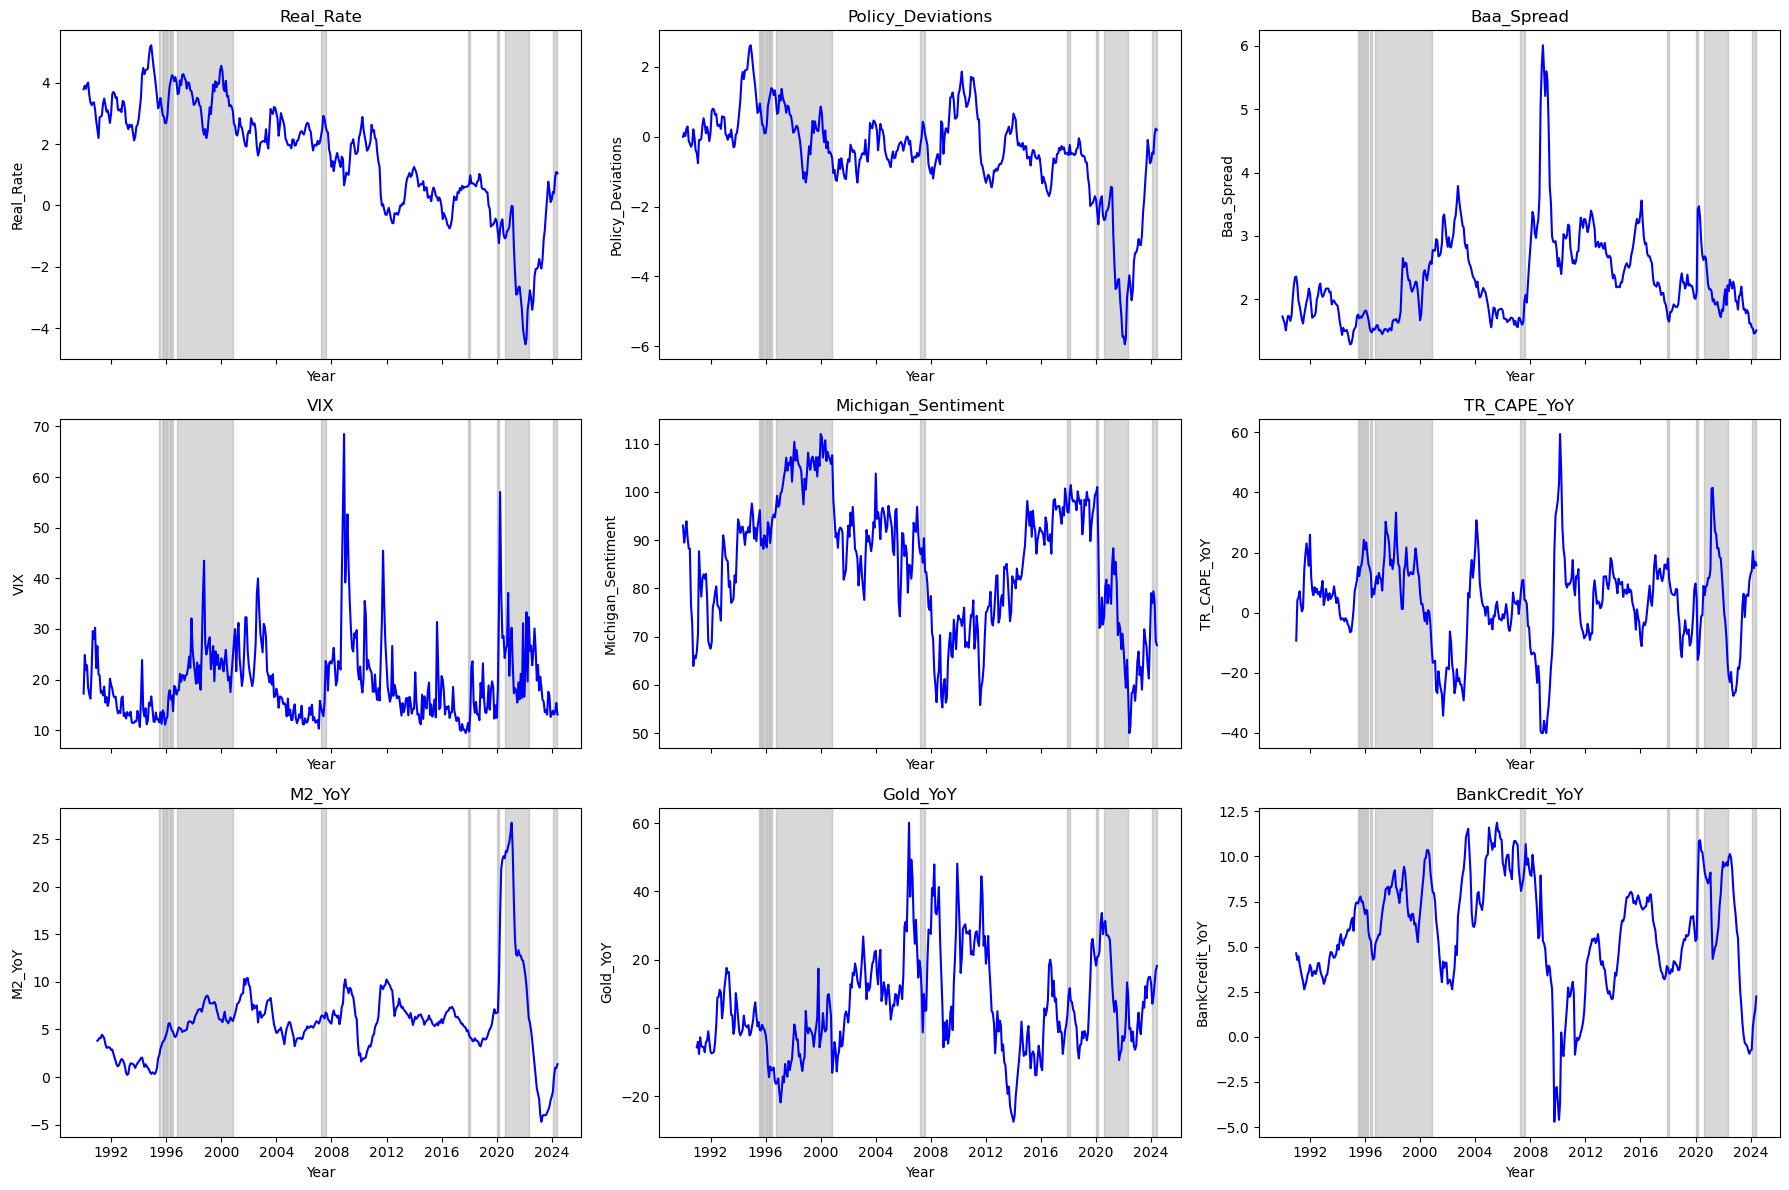

 Figure saved as 'Figure1_TimeSeries.png'


In [24]:
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load dataset with auto date parsing
# -----------------------------
data = pd.read_csv("Data_with_Bubbles.csv")
data["Date"] = pd.to_datetime(data["Date"], format="%m/%d/%y")  # auto-detect format
data = data.set_index("Date")

# -----------------------------
# 2. Get all variable columns automatically (exclude Bubble)
# -----------------------------
variables = [col for col in data.columns if col != "Bubble"]

# -----------------------------
# 3. Function to shade bubble periods
# -----------------------------
def shade_bubbles(ax, bubble_series):
    in_bubble = False
    start = None
    for i in range(len(bubble_series)):
        if bubble_series.iloc[i] == 1 and not in_bubble:
            start = bubble_series.index[i]
            in_bubble = True
        elif bubble_series.iloc[i] == 0 and in_bubble:
            end = bubble_series.index[i]
            ax.axvspan(start, end, color="grey", alpha=0.3)
            in_bubble = False
    if in_bubble:  # bubble runs until last observation
        ax.axvspan(start, bubble_series.index[-1], color="grey", alpha=0.3)

# -----------------------------
# 4. Create fixed 3x3 subplot grid
# -----------------------------
fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharex=True)
axes = axes.flatten()

for i, col in enumerate(variables):
    ax = axes[i]
    ax.plot(data.index, data[col], color="blue", label=col)
    shade_bubbles(ax, data["Bubble"])
    ax.set_title(col)
    ax.set_xlabel("Year")
    ax.set_ylabel(col)

# Hide any unused subplot (since 9 slots but 8 variables)
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# -----------------------------
# 5. Save figure
# -----------------------------
plt.savefig("Figure1_TimeSeries.png", dpi=300)   # PNG
# plt.savefig("Figure1_TimeSeries.pdf")          # Or PDF

plt.show()

print(" Figure saved as 'Figure1_TimeSeries.png'")


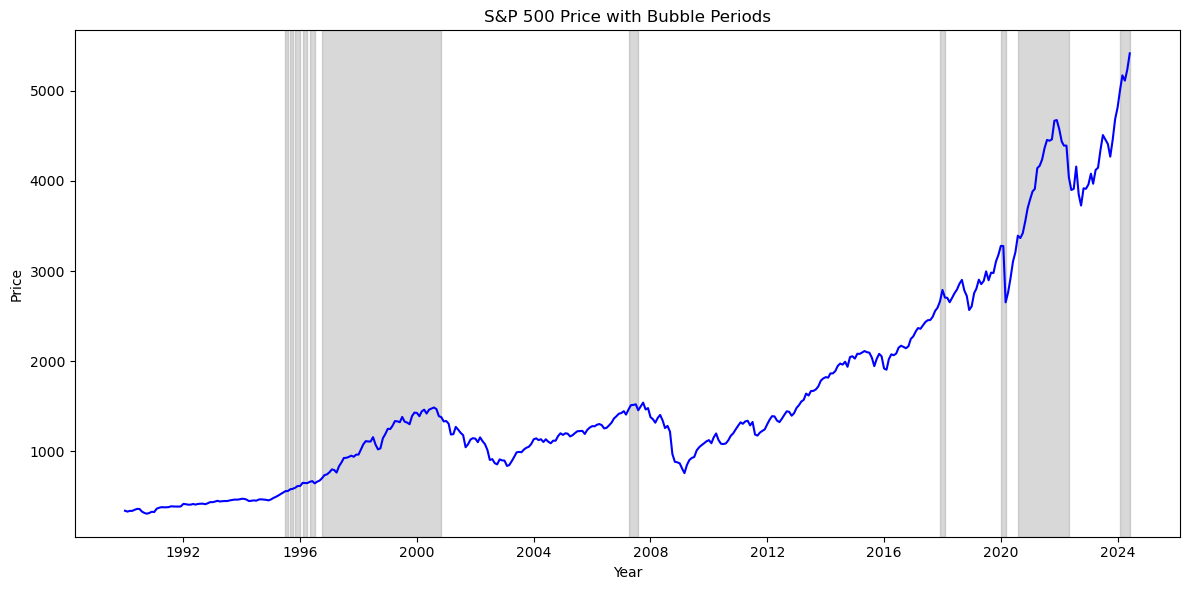

✅ Figure saved as 'Figure_Price_Bubbles.png'


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load both datasets
# -----------------------------
sp500 = pd.read_csv("S&P 500.csv")
sp500["Date"] = pd.to_datetime(sp500["Date"], format="%m/%d/%y")

bubbles = pd.read_csv("Data_with_Bubbles.csv")
bubbles["Date"] = pd.to_datetime(bubbles["Date"], format="%m/%d/%y")

# -----------------------------
# 2. Merge on Date
# -----------------------------
merged = pd.merge(sp500, bubbles[["Date", "Bubble"]], on="Date", how="inner")
merged = merged.set_index("Date")

# -----------------------------
# 3. Plot S&P 500 Price with bubble shading
# -----------------------------
plt.figure(figsize=(12,6))
plt.plot(merged.index, merged["Price"], color="blue", label="S&P 500 Price")

# Shade bubble periods
in_bubble = False
start = None
for i in range(len(merged)):
    if merged["Bubble"].iloc[i] == 1 and not in_bubble:
        start = merged.index[i]
        in_bubble = True
    elif merged["Bubble"].iloc[i] == 0 and in_bubble:
        end = merged.index[i]
        plt.axvspan(start, end, color="grey", alpha=0.3)
        in_bubble = False
if in_bubble:  # if bubble lasts until end
    plt.axvspan(start, merged.index[-1], color="grey", alpha=0.3)

# Formatting
plt.title("S&P 500 Price with Bubble Periods")
plt.xlabel("Year")
plt.ylabel("Price")
plt.tight_layout()

# -----------------------------
# 4. Save figure
# -----------------------------
plt.savefig("Figure_Price_Bubbles.png", dpi=300)   # PNG
# plt.savefig("Figure_Price_Bubbles.pdf")          # PDF alternative
plt.show()

print("✅ Figure saved as 'Figure_Price_Bubbles.png'")
